<a href="https://colab.research.google.com/github/longhtt/Seattle-Weather/blob/main/Long_Tran_Thien_DATA_3320_Seattle_St_Louis_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

#purpose:

The purpose of the assignment is to produce a weather data set that is prepared for the analysis steps of the data science methodology to answer the question of whether it rains more in Seattle, WA than in St. Louis, MO.

By performing this work you will learn:

1. How to perform data cleaning

2. How to write a well-organized and well-commented Colab notebook

3. How to export a data set from Python

## Import libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load the data

The NOAA National Centers for Environmental Information provides access to many types of environmental data, including records of daily precipitation.

We can use their [website](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND) to request records of daily precipitation from Seattle and St. Louis (or other locations of interest) for the last 5 years (2018 - 2022). 

I have already obtained the data. The data are available at this [github repository](https://github.com/brian-fischer/DATA-3320/tree/main/weather) and are called `seattle_rain.csv` and `stl_rain.csv`.

Load the Seattle data set

In [49]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/longhtt/Seattle-Weather/main/seattle_rain.csv')

Load the St. Louis data set

In [50]:
df_stlouis = pd.read_csv('https://raw.githubusercontent.com/longhtt/Seattle-Weather/main/stl_rain.csv')

## Explore the contents of the data sets

seattle df

In [51]:
df_seattle

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,WESD,WESF
0,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/1/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
1,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/2/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
2,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/3/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
3,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/4/18,NaN,NaN,0.00,NaN,NaN,NaN,NaN
4,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",1/5/18,NaN,NaN,0.25,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1653,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",12/27/22,NaN,NaN,0.78,NaN,NaN,NaN,NaN
1654,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",12/28/22,NaN,NaN,0.40,NaN,NaN,NaN,NaN
1655,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",12/29/22,NaN,NaN,0.03,NaN,NaN,NaN,NaN
1656,US1WAKG0225,"SEATTLE 2.1 ESE, WA US",12/30/22,NaN,NaN,0.62,NaN,NaN,NaN,NaN


we can see df_seattle shows only one station for 2018-2022

stl df

In [52]:
df_stlouis

,STATION,NAME,DATE,DAPR,MDPR,PRCP,SNOW,SNWD
0,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-01,NaN,NaN,0.00,0.0,NaN
1,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-03,NaN,NaN,0.35,NaN,NaN
2,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-04,NaN,NaN,0.03,NaN,NaN
3,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-05,NaN,NaN,0.04,1.2,NaN
4,US1MOSS0027,"ST. CHARLES 2.3 NE, MO US",2017-01-06,NaN,NaN,0.00,0.0,1.0
...,...,...,...,...,...,...,...,...
54569,US1MOSL0084,"DES PERES 0.7 SSW, MO US",2022-12-08,NaN,NaN,0.00,NaN,NaN
54570,US1MOSL0084,"DES PERES 0.7 SSW, MO US",2022-12-13,NaN,NaN,0.00,0.0,NaN
54571,US1MOSL0084,"DES PERES 0.7 SSW, MO US",2022-12-14,NaN,NaN,0.89,NaN,NaN
54572,US1MOSL0084,"DES PERES 0.7 SSW, MO US",2022-12-15,NaN,NaN,0.36,NaN,NaN


unlike df_seattle, df_stlouis shows multiple stations for 2017-2022

## Convert data types, if necessary

convert 'DATE' into a datetime obj for both df_seattle and df_stlouis

In [53]:
df_seattle['DATE'] = pd.to_datetime(df_seattle['DATE'])
df_stlouis['DATE'] = pd.to_datetime(df_stlouis['DATE'])

df_seattle and df_stlouis 'DATE's now uses the datatime object

## Are the data suitable for answering the question?

We want to perform quick exploratory data analysis to determine whether the data are sufficient to answer our question. If the data are not sufficient, we do not want to waste time doing anything that will not be productive.

## Select relevant subsets of the data

removing 2017 data from df_stlouis

In [54]:
df_stlouis = df_stlouis[df_stlouis['DATE'] >= '2018-01-01']

now df_stlouis shows that same years as df_seattle

only including one station for df_stlouis

In [55]:
df_stlouis = df_stlouis[df_stlouis['STATION'] == 'USW00013994']

now df_stlouis has only one station just like df_seattle

getting ride of unnessary columns, we only care about PRCP

In [56]:
df_seattle = df_seattle[['STATION', 'DATE', 'PRCP']]
df_seattle

,STATION,DATE,PRCP
0,US1WAKG0225,2018-01-01,0.00
1,US1WAKG0225,2018-01-02,0.00
2,US1WAKG0225,2018-01-03,0.00
3,US1WAKG0225,2018-01-04,0.00
4,US1WAKG0225,2018-01-05,0.25
...,...,...,...
1653,US1WAKG0225,2022-12-27,0.78
1654,US1WAKG0225,2022-12-28,0.40
1655,US1WAKG0225,2022-12-29,0.03
1656,US1WAKG0225,2022-12-30,0.62


now only ['STATION', 'DATE', 'PRCP'] can be seen

getting ride of unnessary columns, we only care about PRCP

In [57]:
df_stlouis = df_stlouis[['STATION', 'DATE', 'PRCP']]
df_stlouis

,STATION,DATE,PRCP
51540,USW00013994,2018-01-01,0.00
51541,USW00013994,2018-01-02,0.00
51542,USW00013994,2018-01-03,0.00
51543,USW00013994,2018-01-04,0.00
51544,USW00013994,2018-01-05,0.00
...,...,...,...
53361,USW00013994,2022-12-27,0.00
53362,USW00013994,2022-12-28,0.00
53363,USW00013994,2022-12-29,0.00
53364,USW00013994,2022-12-30,0.31


now only ['STATION', 'DATE', 'PRCP'] can be seen

## Join data frames keeping `DATE` and `PRCP` columns

In [58]:
df = df_stlouis[['DATE', 'PRCP']].merge(df_seattle[['DATE', 'PRCP']], on = 'DATE', how = 'left')
df

,DATE,PRCP_x,PRCP_y
0,2018-01-01,0.00,0.00
1,2018-01-02,0.00,0.00
2,2018-01-03,0.00,0.00
3,2018-01-04,0.00,0.00
4,2018-01-05,0.00,0.25
...,...,...,...
1821,2022-12-27,0.00,0.78
1822,2022-12-28,0.00,0.40
1823,2022-12-29,0.00,0.03
1824,2022-12-30,0.31,0.62


df is not the merged data frame of stlouis left join with seattle with PRCP_x representing STL and PRCP_y representing Seattle 

## Create a tidy data frame with columns for city and precipitation

In [59]:
df = pd.melt(df, id_vars = 'DATE', var_name='CITY', value_name='PRCP')
df

,DATE,CITY,PRCP
0,2018-01-01,PRCP_x,0.00
1,2018-01-02,PRCP_x,0.00
2,2018-01-03,PRCP_x,0.00
3,2018-01-04,PRCP_x,0.00
4,2018-01-05,PRCP_x,0.00
...,...,...,...
3647,2022-12-27,PRCP_y,0.78
3648,2022-12-28,PRCP_y,0.40
3649,2022-12-29,PRCP_y,0.03
3650,2022-12-30,PRCP_y,0.62


## Create relevant derived variables as new columns

### Rename columns or values to follow best practices

We may already know that we want to process the data to create new variables from the existing variables. However, we often start analyzing the data and realize that it is useful to create new variables derived from the existing variables. It is fine to return to modify this step after exploring the data further.

renaming PRCP_x into STL and PRCP_y into Seattle

In [60]:
df.loc[df['CITY'] == 'PRCP_x', 'CITY'] = 'STL'
df.loc[df['CITY'] == 'PRCP_y', 'CITY'] = 'Seattle'
df

,DATE,CITY,PRCP
0,2018-01-01,STL,0.00
1,2018-01-02,STL,0.00
2,2018-01-03,STL,0.00
3,2018-01-04,STL,0.00
4,2018-01-05,STL,0.00
...,...,...,...
3647,2022-12-27,Seattle,0.78
3648,2022-12-28,Seattle,0.40
3649,2022-12-29,Seattle,0.03
3650,2022-12-30,Seattle,0.62


renaming all columns  

In [61]:
df = df.rename(columns={'DATE':'date', 'CITY':'city', 'PRCP':'precipitation'})
df

,date,city,precipitation
0,2018-01-01,STL,0.00
1,2018-01-02,STL,0.00
2,2018-01-03,STL,0.00
3,2018-01-04,STL,0.00
4,2018-01-05,STL,0.00
...,...,...,...
3647,2022-12-27,Seattle,0.78
3648,2022-12-28,Seattle,0.40
3649,2022-12-29,Seattle,0.03
3650,2022-12-30,Seattle,0.62


giving a day_of_year, day, month and year columns to be used later for ploting and filling missing data 

In [62]:
df['day_of_year'] = pd.DatetimeIndex(df['date']).day_of_year
df['day'] = pd.DatetimeIndex(df['date']).day
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year
df

,date,city,precipitation,day_of_year,day,month,year
0,2018-01-01,STL,0.00,1,1,1,2018
1,2018-01-02,STL,0.00,2,2,1,2018
2,2018-01-03,STL,0.00,3,3,1,2018
3,2018-01-04,STL,0.00,4,4,1,2018
4,2018-01-05,STL,0.00,5,5,1,2018
...,...,...,...,...,...,...,...
3647,2022-12-27,Seattle,0.78,361,27,12,2022
3648,2022-12-28,Seattle,0.40,362,28,12,2022
3649,2022-12-29,Seattle,0.03,363,29,12,2022
3650,2022-12-30,Seattle,0.62,364,30,12,2022


## Identify and deal with missing values

showing missing data in df_seattle

<Axes: >

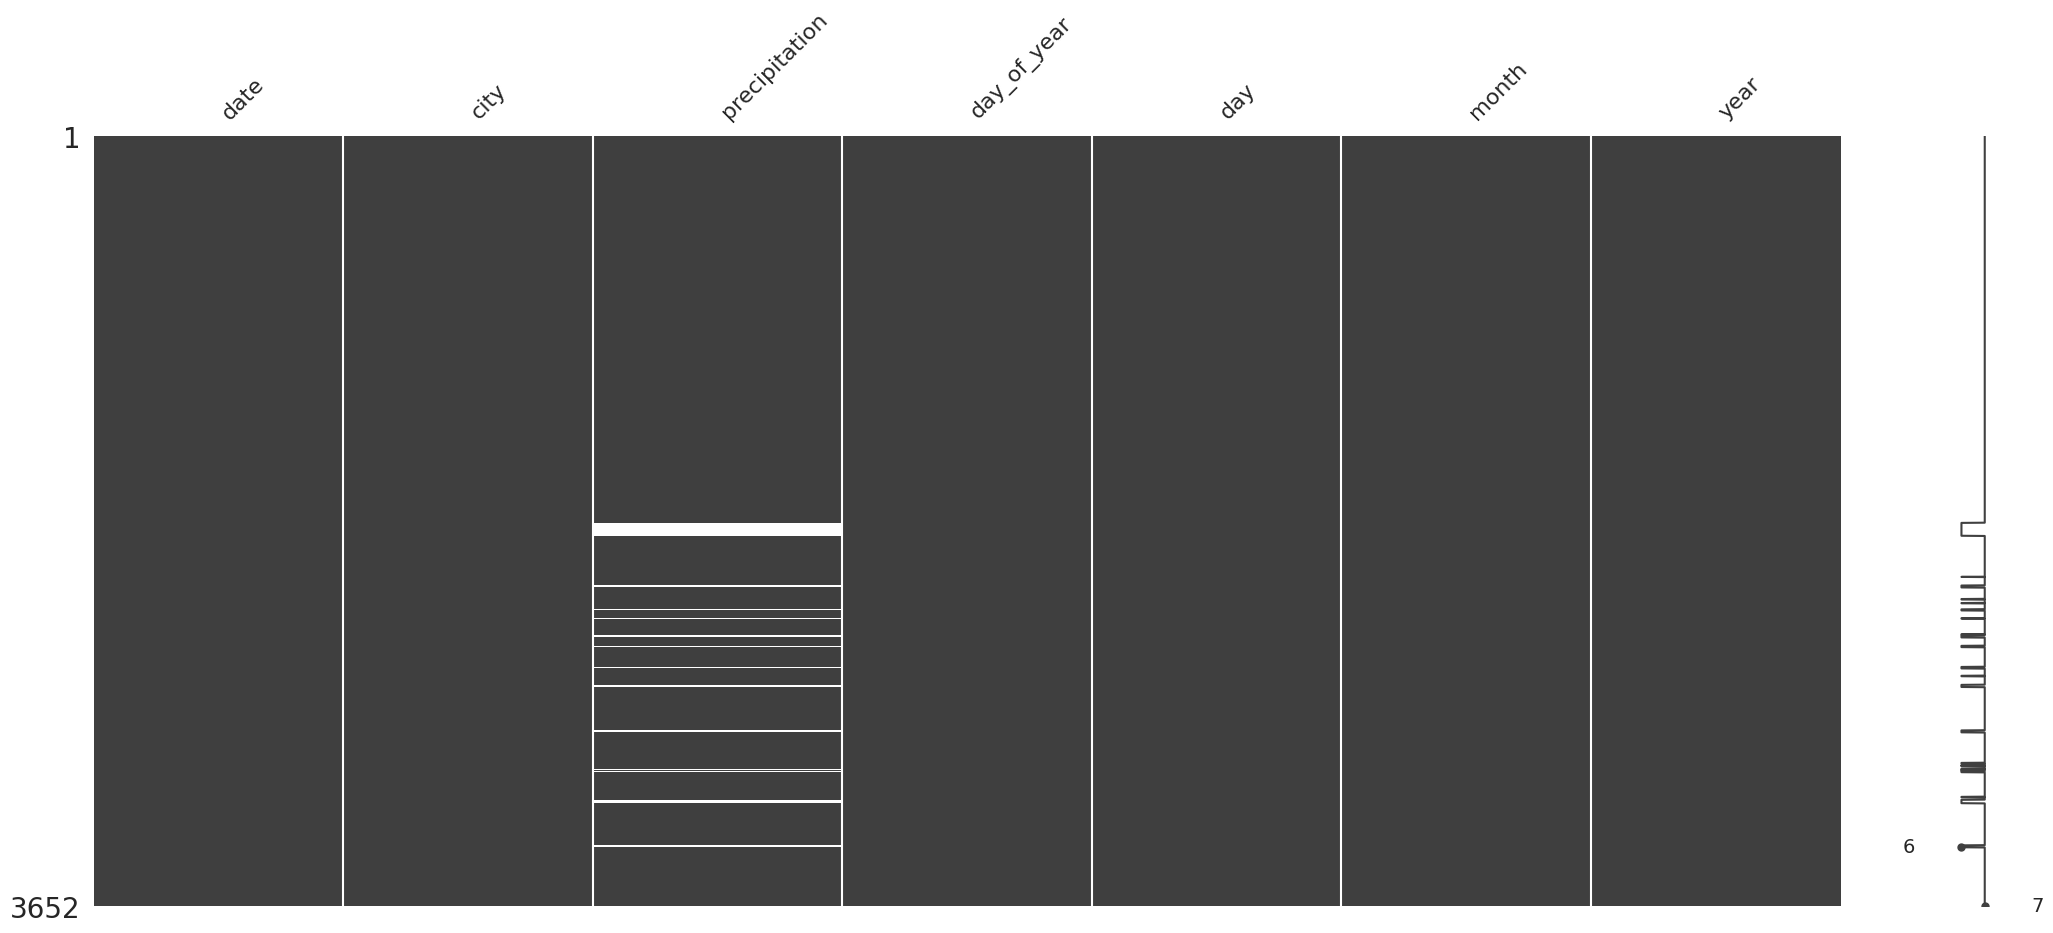

In [63]:
msno.matrix(df)

this tells us that Seattle has missing data for precipitation since we used a left join on stlouis when merging the data frames 

getting the locations(indices) where the missing data is 

In [64]:
indices = np.where(df['precipitation'].isna()==True)[0]
indices

array([1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844,
       1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855,
       1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866,
       1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877,
       1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888,
       1889, 1890, 1891, 1892, 1893, 1894, 1895, 2090, 2131, 2132, 2133,
       2134, 2135, 2136, 2137, 2138, 2139, 2140, 2195, 2196, 2197, 2214,
       2215, 2244, 2245, 2246, 2247, 2248, 2249, 2286, 2287, 2288, 2362,
       2363, 2368, 2369, 2370, 2371, 2372, 2373, 2374, 2375, 2376, 2377,
       2417, 2418, 2419, 2420, 2421, 2422, 2423, 2517, 2518, 2519, 2520,
       2521, 2522, 2523, 2524, 2559, 2560, 2561, 2602, 2603, 2604, 2605,
       2606, 2607, 2608, 2609, 2610, 2611, 2612, 2818, 2819, 2820, 2821,
       2822, 2823, 2824, 2825, 2826, 2827, 2972, 2973, 2974, 2975, 2983,
       2984, 2986, 2987, 2988, 3000, 3001, 3004, 30

indices is now a array that shows locations where precipitation is NaN

creating a mean_day_precipitation df to fill in missing data to df

In [65]:
mean_day_precipitation = df.loc[df['city'] == 'Seattle', ['precipitation', 'day_of_year']].groupby('day_of_year').mean()
mean_day_precipitation

,precipitation
day_of_year,
1,0.052000
2,0.150000
3,0.836000
4,0.370000
5,0.246667
...,...
362,0.120000
363,0.102000
364,0.268000


mean_day_precipitation is now a data frame with each day of the year's mean precipitation 

filling in missing data with its mean for that day of the year

<Axes: >

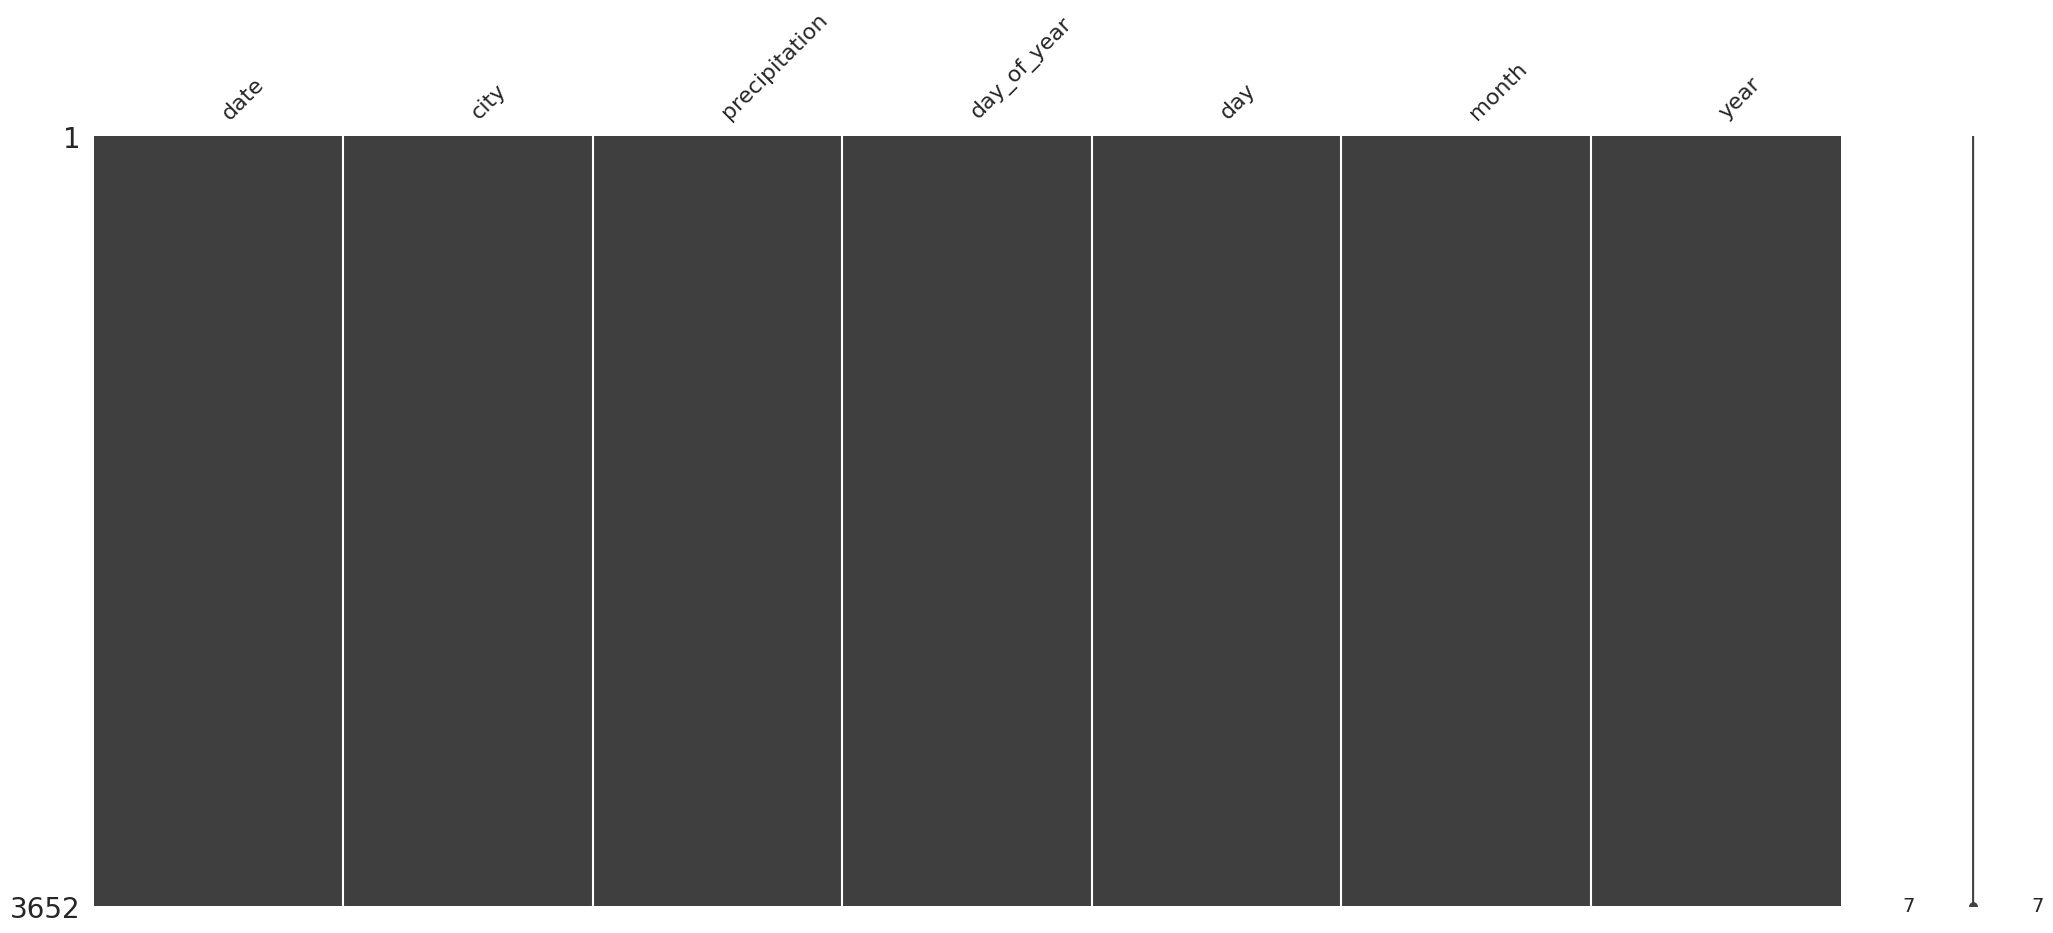

In [66]:
for _, index in enumerate(indices):
  df.loc[index, 'precipitation'] = mean_day_precipitation.loc[df.loc[index, 'day_of_year']].values[0]
msno.matrix(df)

now df has not missing data since all blocks is fully filled, no white spots like before

## Export the clean .csv file

In [67]:
from google.colab import files

# uncomment code to export
#df.to_csv('clean_seattle_stl_weather.csv', encoding = 'utf-8-sig', index=False) 

#files.download('clean_seattle_stl_weather.csv')

##plots

to answering the question which city has more precipitation? we can create plots that can show us what is going on.

<Axes: xlabel='month', ylabel='precipitation'>

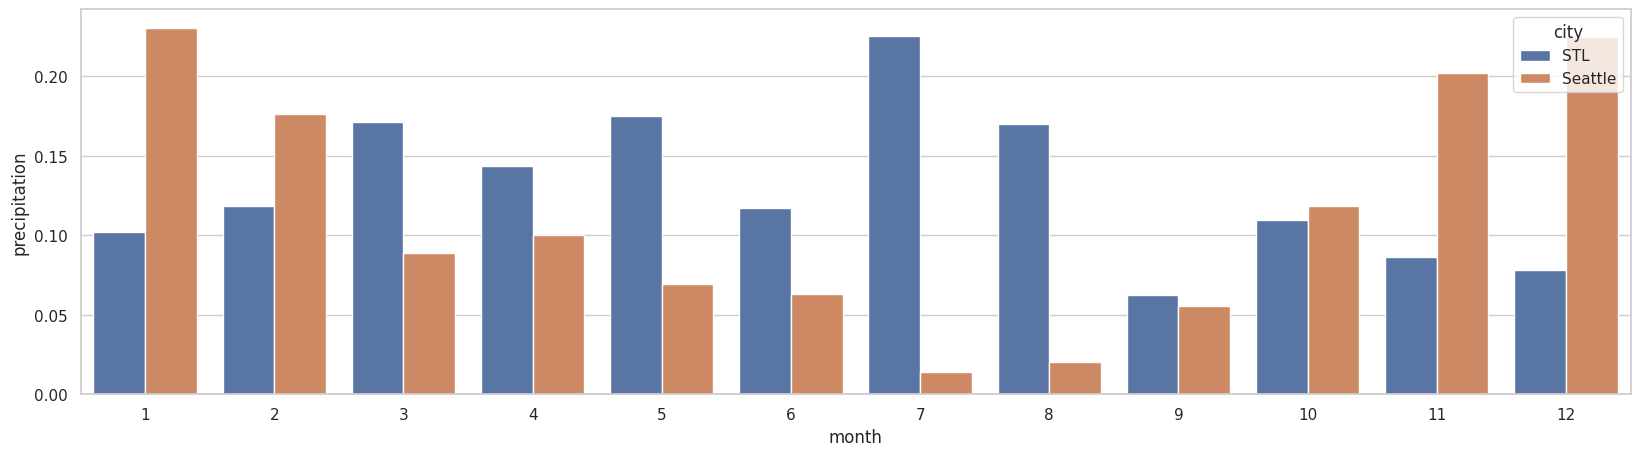

In [68]:
plt.figure(figsize = (20,5))
sns.barplot(data = df, x = 'month', y = 'precipitation', hue = 'city', errorbar = None)

using the plot we can see during the winter, Seattle has more precipitation while transitions to the summer, St. Louis has more precipitation. We can also see st. louis precipitation does not dip under 0.05 while Seattle does

creating a plot to see the avg.precipitation for each year

<Axes: xlabel='year', ylabel='precipitation'>

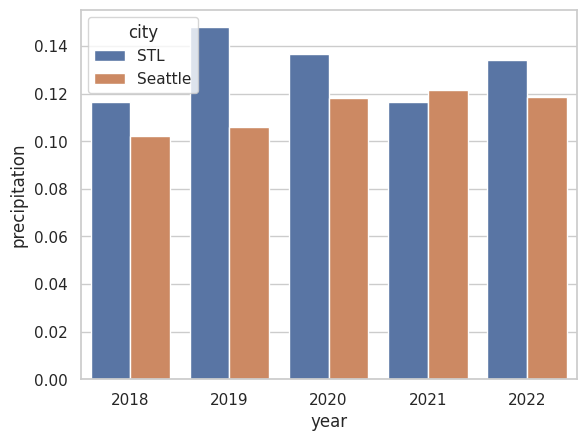

In [69]:
# a bargraph that shows the average precipitation between each city grouped by years
sns.barplot(data = df, x = 'year', y = 'precipitation', hue = 'city', errorbar = None)


using this plot, we can see 4 out of the 5 years, St. Louis had more precipitation

##### over all the st. louis get more precipitation then seattle